This project starts by building a diversified multi-asset dataset that includes equities, bonds, real estate, commodities, and gold. Over eight years of daily market price data were downloaded and cleaned, with prices adjusted for dividends and splits. The data was checked for missing values and aligned across all assets. Daily returns were then calculated and saved for use in portfolio construction and performance analysis.

Step 1 - Key Imports

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

Step 2- Defining the Asset Universe

In [2]:
tickers = {
    "US_Equities": "SPY",
    "Intl_Equities": "VXUS",
    "US_Bonds": "BND",
    "Real_Estate": "VNQ",
    "Commodities": "DBC",
    "Gold": "GLD"
}


Step 3 - Data Collection and cleaning

In [6]:
prices = yf.download(
    list(tickers.values()),
    start="2016-01-01",
    auto_adjust=True
)

[*********************100%***********************]  6 of 6 completed


I used auto-adjusted prices to account for dividends and splits, ensuring return calculations reflect true total return behavior.

In [8]:
prices.head()

Price           Close                                                \
Ticker            BND        DBC         GLD         SPY        VNQ   
Date                                                                  
2016-01-04  60.487854  11.210504  102.889999  170.372208  52.950977   
2016-01-05  60.562798  11.100596  103.180000  170.660370  53.972752   
2016-01-06  60.832588  10.923055  104.669998  168.507599  53.824860   
2016-01-07  60.840073  10.872327  106.150002  164.464874  52.776203   
2016-01-08  60.915016  10.821601  105.680000  162.659561  52.070362   

Price                       High                                     ...  \
Ticker           VXUS        BND        DBC         GLD         SPY  ...   
Date                                                                 ...   
2016-01-04  32.674965  60.645218  11.421863  103.669998  170.380678  ...   
2016-01-05  32.616005  60.622747  11.202049  103.459999  171.118035  ...   
2016-01-06  32.063187  60.832588  11.041416  104.800003  169.558538  ...   
2016-01-07  31.399807  60.847562  10.973779  106.239998  167.338030  ...   
2016-01-08  31.031269  60.937496  10.889236  105.800003  165.990394  ...   

Price             Open                                     Volume            \
Ticker             GLD         SPY        VNQ       VXUS      BND       DBC   
Date                                                                          
2016-01-04  103.129997  169.923013  53.152646  32.785526  2750500   2307600   
2016-01-05  103.129997  170.694266  52.971141  32.682343  1513600   1210000   
2016-01-06  104.370003  168.100771  53.488748  32.004219  2391100   2668600   
2016-01-07  105.830002  165.549723  53.172812  31.503001  2792900  10692400   
2016-01-08  105.480003  165.431015  53.132475  31.635678  1405100   2809600   

Price                                              
Ticker           GLD        SPY      VNQ     VXUS  
Date                                               
2016-01-04   6440000  222353500  8843700  1497200  
2016-01-05   3500300  110845800  7114700   651100  
2016-01-06   9316600  152112600  5481200   991500  
2016-01-07  11730400  213436100  6297500  1900800  
2016-01-08   7678200  209817200  4628600   794700  

[5 rows x 30 columns]

In [9]:
prices = prices["Close"]
prices.columns = tickers.keys()

In [10]:
prices.head()
prices.tail()
prices.isna().sum()

US_Equities      0
Intl_Equities    0
US_Bonds         0
Real_Estate      0
Commodities      0
Gold             0
dtype: int64

In [11]:
prices.to_csv("../data/prices.csv")

Step 4- Asset-Level Risk and Return Analysis

In [12]:
prices = pd.read_csv("../data/prices.csv", index_col=0, parse_dates=True)

In [13]:
prices.head()
prices.shape

(2525, 6)

step 4- return computation

In [14]:
#compute daily returns
returns = prices.pct_change().dropna()
returns.head()
#Returns, not prices, are what drive risk and portfolio behavior.

,US_Equities,Intl_Equities,US_Bonds,Real_Estate,Commodities,Gold
Date,,,,,,
2016-01-05,0.001239,-0.009804,0.002819,0.001691,0.019297,-0.001804
2016-01-06,0.004455,-0.015994,0.014441,-0.012614,-0.002740,-0.016949
2016-01-07,0.000123,-0.004644,0.014140,-0.023991,-0.019483,-0.020690
2016-01-08,0.001232,-0.004666,-0.004428,-0.010977,-0.013374,-0.011737
2016-01-11,-0.004183,-0.027344,-0.008895,0.000990,0.005680,0.002138


step 5- Asset level risk and performance analysis

In [15]:
#compute annualised statistics
#assume 252 trading days
annual_return = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)
sharpe_ratio = annual_return / annual_volatility

In [16]:
#clean summary table
asset_stats = pd.DataFrame({
    "Annual Return": annual_return,
    "Annual Volatility": annual_volatility,
    "Sharpe Ratio": sharpe_ratio
})

In [17]:
asset_stats = asset_stats.round(3)
asset_stats

,Annual Return,Annual Volatility,Sharpe Ratio
US_Equities,0.022,0.055,0.399
Intl_Equities,0.088,0.176,0.501
US_Bonds,0.152,0.148,1.024
Real_Estate,0.156,0.180,0.869
Commodities,0.078,0.208,0.374
Gold,0.102,0.171,0.598


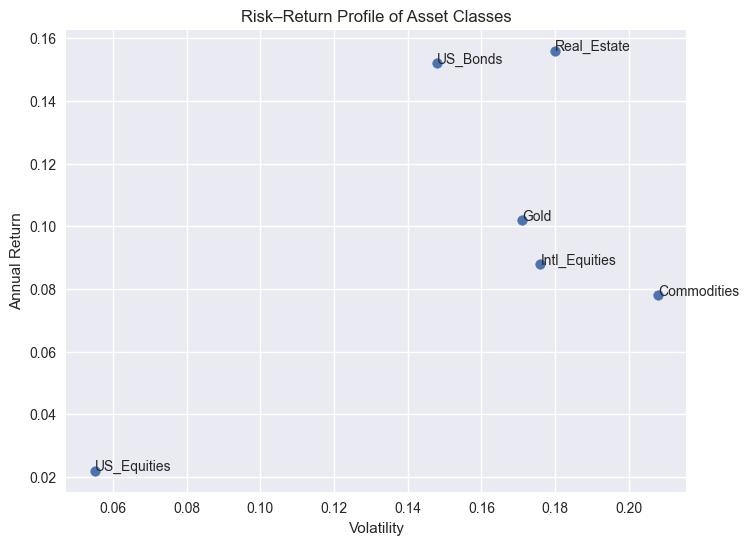

In [95]:
#Visualize risk vs return
plt.figure(figsize=(8,6))
plt.scatter(asset_stats["Annual Volatility"], asset_stats["Annual Return"])

for asset in asset_stats.index:
    plt.text(
        asset_stats.loc[asset, "Annual Volatility"],
        asset_stats.loc[asset, "Annual Return"],
        asset
    )

plt.xlabel("Volatility")
plt.ylabel("Annual Return")
plt.title("Risk–Return Profile of Asset Classes")
plt.savefig("../figures/Risk–Return Profile of Asset Classes.png", bbox_inches="tight")
plt.show()

#I compared assets on a risk–return plane before optimizing portfolios


In [19]:
#save outputs
asset_stats.to_csv("../data/asset_level_statistics.csv")
returns.to_csv("../data/returns.csv")

Before constructing portfolios, I analyzed each asset’s standalone return, volatility, and Sharpe ratio to understand diversification tradeoffs.

step 6- Equal-Weight Portfolio Construction 

In [20]:
#portfolio weights
n_assets = returns.shape[1]
weights_equal = np.array([1 / n_assets] * n_assets)

weights_equal


array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [21]:
weights_equal.sum()


np.float64(0.9999999999999999)

In [22]:
#portfolio daily returns
portfolio_returns_eq = returns @ weights_equal

In [24]:
#portfolio performance metrics
eq_ann_return = portfolio_returns_eq.mean() * 252
eq_ann_vol = portfolio_returns_eq.std() * np.sqrt(252)
eq_sharpe = eq_ann_return / eq_ann_vol


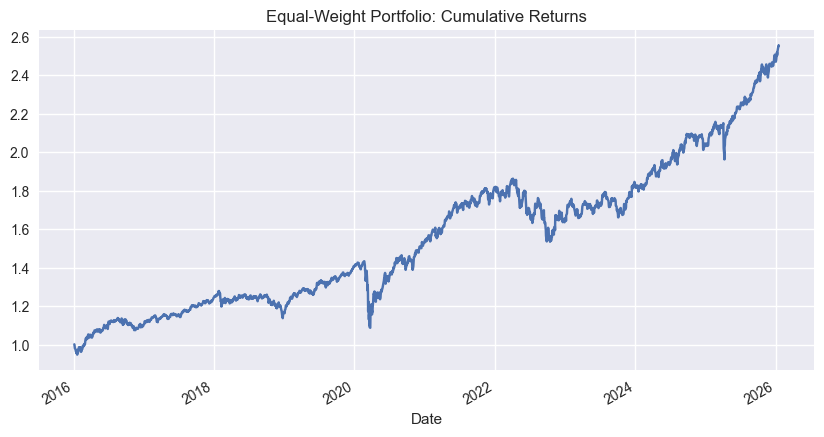

In [94]:
#compute cumulative returns
eq_cumulative = (1 + portfolio_returns_eq).cumprod()
eq_cumulative.plot(
    figsize=(10,5),
    title="Equal-Weight Portfolio: Cumulative Returns"
)
plt.savefig("../figures/Equal-Weight Portfolio: Cumulative Returns.png", bbox_inches="tight")
plt.show()


In [27]:
#compute maximum drawdown
rolling_max = eq_cumulative.cummax()
drawdown = (eq_cumulative - rolling_max) / rolling_max
max_drawdown = drawdown.min()

max_drawdown

np.float64(-0.2411791152700919)

In [28]:
#store results in comparison table
eq_stats = pd.DataFrame({
    "Annual Return": [eq_ann_return],
    "Annual Volatility": [eq_ann_vol],
    "Sharpe Ratio": [eq_sharpe],
    "Max Drawdown": [max_drawdown]
}, index=["Equal-Weight"])

eq_stats.round(3)


,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown
Equal-Weight,0.1,0.109,0.912,-0.241


Step 7- Mean Variance Portfolio Optimisation

In [29]:
#compute expected return and covariance
mu = returns.mean() * 252
cov = returns.cov() * 252


In [30]:
#define portfolio volatility
def portfolio_volatility(weights, cov):
    return np.sqrt(weights.T @ cov @ weights)


In [31]:
#define constraints
constraints = (
    {"type": "eq", "fun": lambda w: np.sum(w) - 1}
)

bounds = [(0, 1)] * len(mu)


In [32]:
#starting guess
w0 = np.array([1 / len(mu)] * len(mu))


In [33]:
#run optimisation to get mean variance optimal weights
from scipy.optimize import minimize

opt_mv = minimize(
    portfolio_volatility,
    w0,
    args=(cov,),
    method="SLSQP",
    bounds=bounds,
    constraints=constraints
)

weights_mv = opt_mv.x
weights_mv


array([8.94482288e-01, 8.43394141e-02, 0.00000000e+00, 2.11782977e-02,
       0.00000000e+00, 7.28463863e-18])

In [34]:
#compute portfolio returns
portfolio_returns_mv = returns @ weights_mv


In [35]:
#compute performance metrics
mv_ann_return = portfolio_returns_mv.mean() * 252
mv_ann_vol = portfolio_returns_mv.std() * np.sqrt(252)
mv_sharpe = mv_ann_return / mv_ann_vol


In [36]:
#compute cumulative returns and drawdowns
mv_cumulative = (1 + portfolio_returns_mv).cumprod()

rolling_max_mv = mv_cumulative.cummax()
drawdown_mv = (mv_cumulative - rolling_max_mv) / rolling_max_mv
mv_max_drawdown = drawdown_mv.min()


In [37]:
#add results to comparison table
mv_stats = pd.DataFrame({
    "Annual Return": [mv_ann_return],
    "Annual Volatility": [mv_ann_vol],
    "Sharpe Ratio": [mv_sharpe],
    "Max Drawdown": [mv_max_drawdown]
}, index=["Mean-Variance"])


Step 8- Risk Parity Portfolio
Each asset to contribute equally to total portfolio risk.

In [38]:
#annualised covariance matrix
cov = returns.cov() * 252
n_assets = returns.shape[1]

In [39]:
#portfolio volatility function
def portfolio_volatility(weights, cov):
    return np.sqrt(weights.T @ cov @ weights)

In [40]:
#marginal risk contribution
def marginal_risk_contribution(weights, cov):
    portfolio_var = weights.T @ cov @ weights
    return (cov @ weights) / np.sqrt(portfolio_var)

In [41]:
#total risk contribution
def risk_contribution(weights, cov):
    mrc = marginal_risk_contribution(weights, cov)
    return weights * mrc


In [42]:
#risk parity objective function
def risk_parity_objective(weights, cov):
    rc = risk_contribution(weights, cov)
    target_rc = np.mean(rc)
    return np.sum((rc - target_rc) ** 2)


In [43]:
#constraints and bounds
constraints = (
    {"type": "eq", "fun": lambda w: np.sum(w) - 1}
)

bounds = [(0, 1)] * n_assets


In [44]:
#initial guess- equal weights
w0 = np.array([1 / n_assets] * n_assets)


In [45]:
#optimization
from scipy.optimize import minimize

opt_rp = minimize(
    risk_parity_objective,
    w0,
    args=(cov,),
    method="SLSQP",
    bounds=bounds,
    constraints=constraints
)

weights_rp = opt_rp.x
weights_rp


array([0.4367798 , 0.12324897, 0.15746787, 0.09928415, 0.08689203,
       0.09632717])

In [46]:
#check weights
weights_rp.sum()


np.float64(1.0)

In [47]:
#compute portfolio returns
portfolio_returns_rp = returns @ weights_rp


In [48]:
#performance metrics
rp_ann_return = portfolio_returns_rp.mean() * 252
rp_ann_vol = portfolio_returns_rp.std() * np.sqrt(252)
rp_sharpe = rp_ann_return / rp_ann_vol


In [49]:
#cumulative returns
rp_cumulative = (1 + portfolio_returns_rp).cumprod()


In [50]:
#maximum drawdown
rolling_max_rp = rp_cumulative.cummax()
drawdown_rp = (rp_cumulative - rolling_max_rp) / rolling_max_rp
rp_max_drawdown = drawdown_rp.min()


In [51]:
#store results
rp_stats = pd.DataFrame({
    "Annual Return": [rp_ann_return],
    "Annual Volatility": [rp_ann_vol],
    "Sharpe Ratio": [rp_sharpe],
    "Max Drawdown": [rp_max_drawdown]
}, index=["Risk Parity"])

rp_stats.round(3)


,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown
Risk Parity,0.076,0.078,0.984,-0.165


In [52]:
#risk contribution check
rc = risk_contribution(weights_rp, cov)
rc / rc.sum()


US_Equities      0.166178
Intl_Equities    0.160834
US_Bonds         0.167263
Real_Estate      0.168184
Commodities      0.171351
Gold             0.166190
dtype: float64

Step 9- Portfolio Comparison

In [53]:
#combining stats into one table
portfolio_comparison = pd.concat([eq_stats, mv_stats, rp_stats])
portfolio_comparison.round(3)


,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown
Equal-Weight,0.100,0.109,0.912,-0.241
Mean-Variance,0.030,0.052,0.582,-0.148
Risk Parity,0.076,0.078,0.984,-0.165


- Equal weighting ignores risk differences, so higher-volatility assets dominate portfolio risk, leading to higher returns but sharper losses during market stress.
- In the mean variance portfolio- the optimizer concentrates heavily in low-volatility assets, minimizing risk but sacrificing return potential.
- The Risk parity achieves the best return per unit of risk by equalizing risk contributions across assets, avoiding concentration in any single source of volatility.

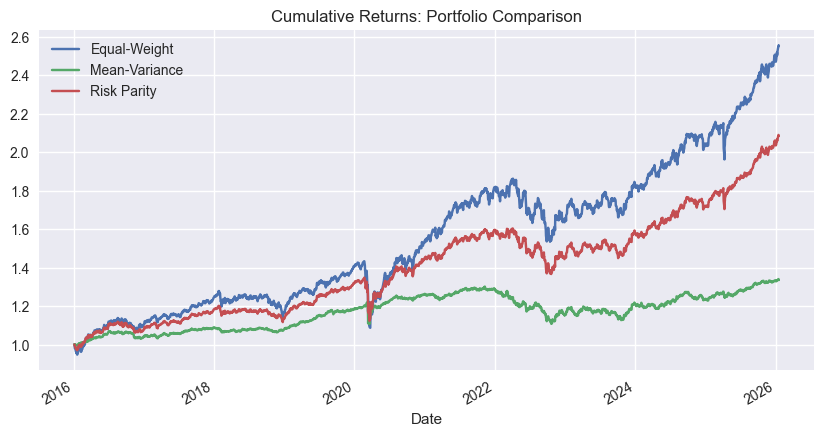

In [93]:
#visual comparison of cumulative performance
plt.figure(figsize=(10,5))

eq_cumulative.plot(label="Equal-Weight")
mv_cumulative.plot(label="Mean-Variance")
rp_cumulative.plot(label="Risk Parity")

plt.title("Cumulative Returns: Portfolio Comparison")
plt.legend()
plt.savefig("../figures/Cumulative Returns: Portfolio Comparison.png", bbox_inches="tight")
plt.show()


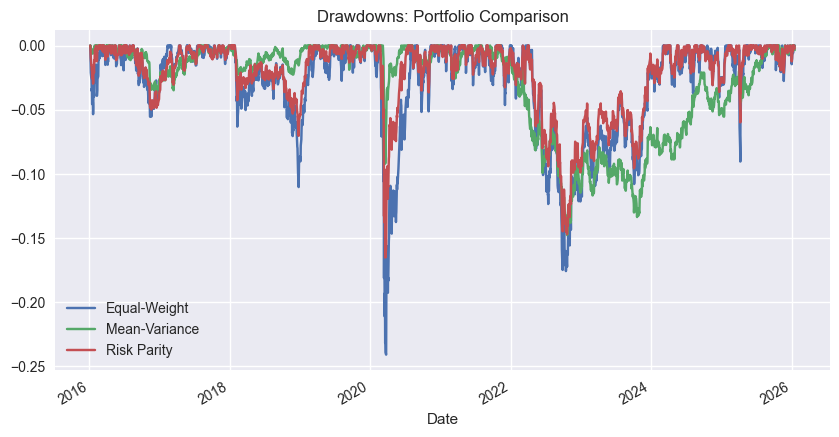

In [92]:
#visual comparison of drawdowns
plt.figure(figsize=(10,5))

drawdown.plot(label="Equal-Weight")
drawdown_mv.plot(label="Mean-Variance")
drawdown_rp.plot(label="Risk Parity")

plt.title("Drawdowns: Portfolio Comparison")
plt.legend()
plt.savefig("../figures/Drawdowns: Portfolio Comparison.png", bbox_inches="tight")
plt.show()


In [56]:
#weight comparison
weights_df = pd.DataFrame({
    "Equal-Weight": weights_equal,
    "Mean-Variance": weights_mv,
    "Risk Parity": weights_rp
}, index=returns.columns)

weights_df.round(3)


,Equal-Weight,Mean-Variance,Risk Parity
US_Equities,0.167,0.894,0.437
Intl_Equities,0.167,0.084,0.123
US_Bonds,0.167,0.000,0.157
Real_Estate,0.167,0.021,0.099
Commodities,0.167,0.000,0.087
Gold,0.167,0.000,0.096


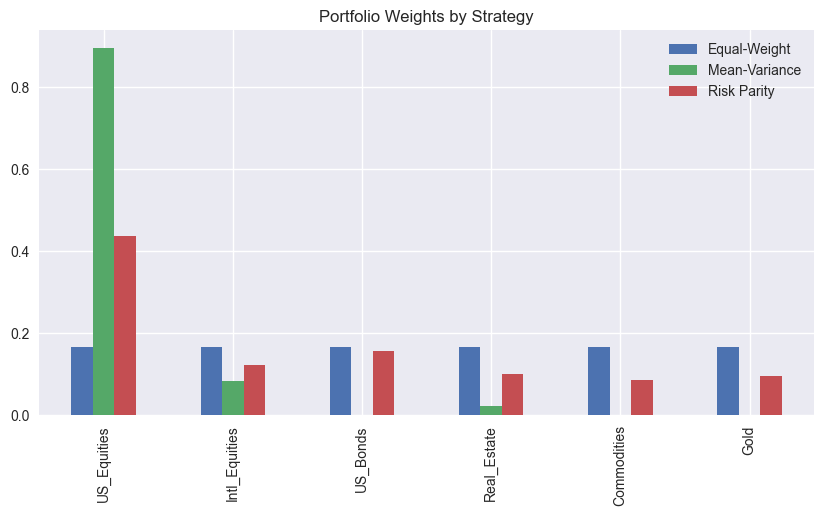

In [91]:
#bar chart of weights
weights_df.plot(kind="bar", figsize=(10,5))
plt.title("Portfolio Weights by Strategy")
plt.savefig("../figures/Portfolio Weights by Strategy.png", bbox_inches="tight")
plt.show()


Step 10- Benchmark Analysis

In [58]:
#define benchmark weights
benchmark_weights = {
    "US_Equities": 0.6,
    "US_Bonds": 0.4
}

In [59]:
#extract benchmark returns
benchmark_returns = (
    benchmark_weights["US_Equities"] * returns["US_Equities"] +
    benchmark_weights["US_Bonds"] * returns["US_Bonds"]
)

In [60]:
#compute benchmark performance metrics
bm_ann_return = benchmark_returns.mean() * 252
bm_ann_vol = benchmark_returns.std() * np.sqrt(252)
bm_sharpe = bm_ann_return / bm_ann_vol


In [61]:
#compute cumulative returns and drawdowns
bm_cumulative = (1 + benchmark_returns).cumprod()

rolling_max_bm = bm_cumulative.cummax()
drawdown_bm = (bm_cumulative - rolling_max_bm) / rolling_max_bm
bm_max_drawdown = drawdown_bm.min()


In [62]:
#store benchmark results
benchmark_stats = pd.DataFrame({
    "Annual Return": [bm_ann_return],
    "Annual Volatility": [bm_ann_vol],
    "Sharpe Ratio": [bm_sharpe],
    "Max Drawdown": [bm_max_drawdown]
}, index=["60/40 Benchmark"])

benchmark_stats.round(3)


,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown
60/40 Benchmark,0.074,0.077,0.961,-0.195


In [63]:
#add benchmark comparison to the table
full_comparison = pd.concat([
    portfolio_comparison,
    benchmark_stats
])

full_comparison.round(3)


,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown
Equal-Weight,0.100,0.109,0.912,-0.241
Mean-Variance,0.030,0.052,0.582,-0.148
Risk Parity,0.076,0.078,0.984,-0.165
60/40 Benchmark,0.074,0.077,0.961,-0.195


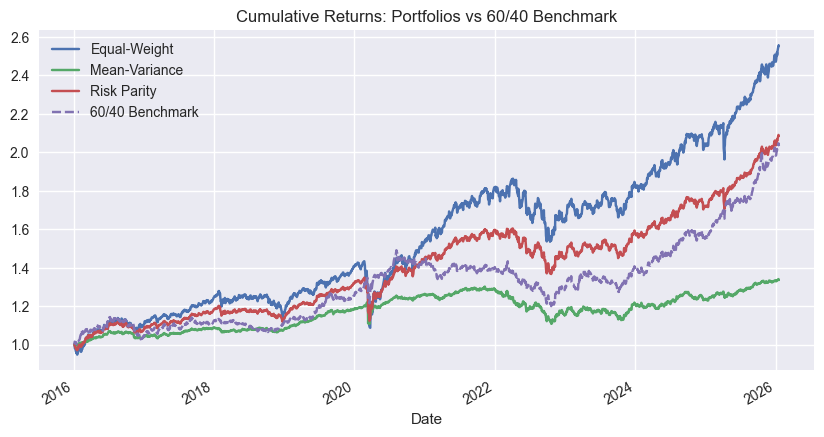

In [90]:
#visual comparison - cumulative returns
# Visual comparison – cumulative returns
plt.figure(figsize=(10,5))

eq_cumulative.plot(label="Equal-Weight")
mv_cumulative.plot(label="Mean-Variance")
rp_cumulative.plot(label="Risk Parity")
bm_cumulative.plot(label="60/40 Benchmark", linestyle="--")

plt.title("Cumulative Returns: Portfolios vs 60/40 Benchmark")
plt.legend()

plt.savefig(
    "../figures/cumulative_returns_portfolios_vs_60_40_benchmark.png",
    bbox_inches="tight"
)

plt.show()


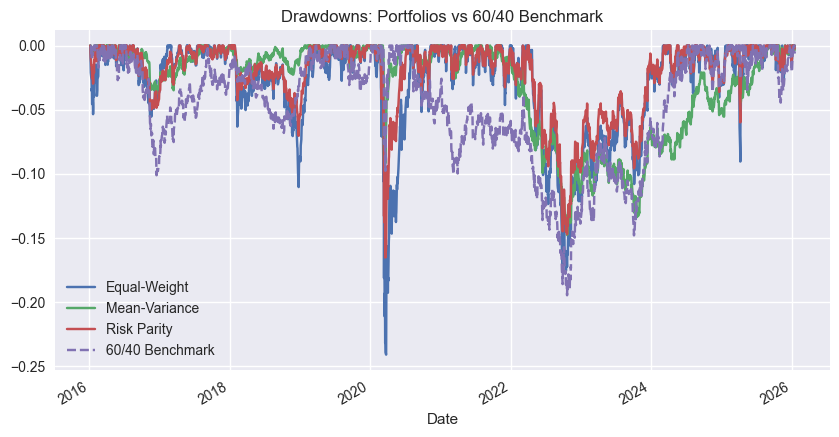

In [88]:
#visual comparison- drawdowns
plt.figure(figsize=(10,5))

drawdown.plot(label="Equal-Weight")
drawdown_mv.plot(label="Mean-Variance")
drawdown_rp.plot(label="Risk Parity")
drawdown_bm.plot(label="60/40 Benchmark", linestyle="--")

plt.title("Drawdowns: Portfolios vs 60/40 Benchmark")
plt.legend()
plt.savefig(
    "../figures/drawdowns_portfolios_vs_60_40_benchmark.png",
    bbox_inches="tight"
)

plt.show()


Step 11- Rolling Sharpe Ratio and rolling Volatility

In [66]:
#choose rolling window
window = 252

In [67]:
#prepare return series
portfolio_returns = pd.DataFrame({
    "Equal-Weight": portfolio_returns_eq,
    "Mean-Variance": portfolio_returns_mv,
    "Risk Parity": portfolio_returns_rp,
    "60/40 Benchmark": benchmark_returns
})


In [68]:
#Rolling annualized volatility
rolling_vol = (
    portfolio_returns
    .rolling(window)
    .std()
    * np.sqrt(252)
)


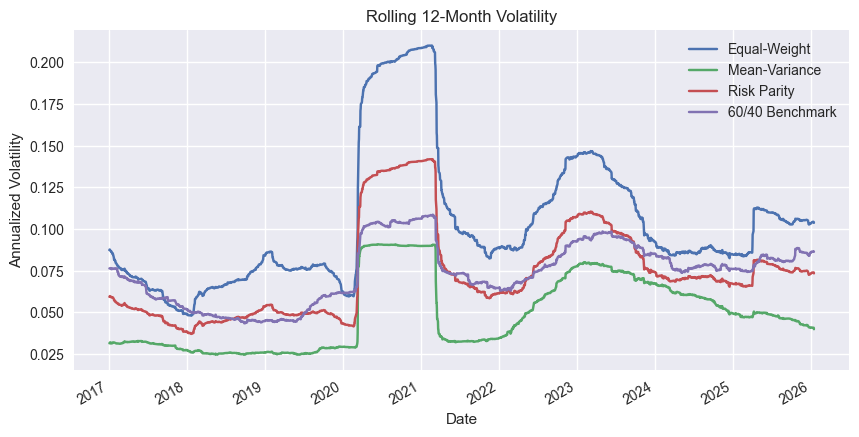

In [85]:
#plot rolling volatility
rolling_vol.plot(
    figsize=(10,5),
    title="Rolling 12-Month Volatility"
)
plt.ylabel("Annualized Volatility")
plt.savefig("../figures/Rolling 12-Month Volatility.png", bbox_inches="tight")
plt.show()


In [70]:
#rolling sharpe ratio
rolling_return = (
    portfolio_returns
    .rolling(window)
    .mean()
    * 252
)

rolling_sharpe = rolling_return / rolling_vol


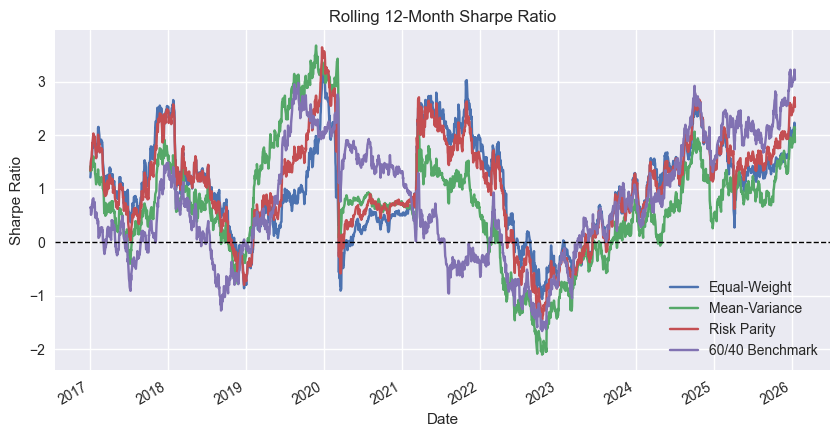

In [84]:
#plot rolling sharpe ratio
rolling_sharpe.plot(
    figsize=(10,5),
    title="Rolling 12-Month Sharpe Ratio"
)
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.ylabel("Sharpe Ratio")
plt.savefig("../figures/rolling_sharpe_ratio.png", bbox_inches="tight")
plt.show()


Step 12- Regime Analysis- crisis vs calm periods

In [72]:
# Compute cumulative returns for US equities
equity_cumulative = (1 + returns["US_Equities"]).cumprod()

# Compute drawdown
equity_rolling_max = equity_cumulative.cummax()
equity_drawdown = (equity_cumulative - equity_rolling_max) / equity_rolling_max


In [78]:
regime = pd.Series(
    np.where(equity_drawdown < -0.10, "Crisis", "Calm"),
    index=returns.index
)



I used a 10% drawdown threshold to define crisis periods because it aligns with market convention for identifying meaningful equity market stress while ensuring sufficient observations within the sample period. A stricter threshold (e.g., 20%) would have eliminated crisis observations in this dataset, reducing the interpretability and usefulness of the regime analysis.

In [79]:
#attach regimes to portfolio returns
portfolio_returns["Regime"] = regime


In [81]:
#compute performance by regimes
def regime_stats(df, portfolio_name):
    stats = {}
    for r in ["Calm", "Crisis"]:
        subset = df[df["Regime"] == r][portfolio_name]
        stats[r] = {
            "Annual Return": subset.mean() * 252,
            "Annual Volatility": subset.std() * np.sqrt(252)
        }
    return pd.DataFrame(stats).T


In [82]:
#apply to portfolios
eq_regime = regime_stats(portfolio_returns, "Equal-Weight")
mv_regime = regime_stats(portfolio_returns, "Mean-Variance")
rp_regime = regime_stats(portfolio_returns, "Risk Parity")
bm_regime = regime_stats(portfolio_returns, "60/40 Benchmark")


In [83]:
#combine regime results
regime_comparison = pd.concat(
    {
        "Equal-Weight": eq_regime,
        "Mean-Variance": mv_regime,
        "Risk Parity": rp_regime,
        "60/40 Benchmark": bm_regime
    }
)

regime_comparison.round(3)


Annual Return  Annual Volatility
Equal-Weight    Calm            0.119              0.107
                Crisis          0.032              0.115
Mean-Variance   Calm            0.041              0.046
                Crisis         -0.005              0.069
Risk Parity     Calm            0.092              0.074
                Crisis          0.021              0.089
60/40 Benchmark Calm            0.087              0.074
                Crisis          0.027              0.087

Step 13- Final Analysis and Recommendation

Executive Summary
This analysis compared equal-weight, mean–variance, and risk-parity portfolio constructions using over eight years of multi-asset data, evaluating performance both overall and across market regimes. While equal-weight portfolios delivered the highest absolute returns in calm markets, they suffered the largest drawdowns during crises. Mean–variance optimization minimized volatility but produced low returns and fragile allocations. Risk parity emerged as the strongest risk-adjusted strategy, delivering competitive returns with materially improved downside protection and the highest Sharpe ratio.

Portfolio Behavior Across Market Regimes
Calm Markets
- The equal-weight portfolio achieved the highest annual return (11.9%) but with elevated volatility, reflecting heavy exposure to equity risk.
- Risk parity and the 60/40 benchmark delivered similar returns (~9%) with significantly lower volatility, indicating more efficient diversification.
- Mean–variance remained highly defensive, producing limited upside despite stable risk.
Crisis Periods
- The equal-weight portfolio experienced sharp volatility and large drawdowns, despite remaining marginally positive on average.
- Mean–variance protected capital better but produced slightly negative returns, highlighting opportunity cost during recoveries.
- Risk parity demonstrated the most balanced crisis performance, maintaining positive returns (2.1%) while controlling volatility.
- The 60/40 benchmark behaved similarly to risk parity but with slightly larger drawdowns.
- These regime results explain why portfolios with similar long-run returns can feel very different to investors during periods of stress.

Overall Performance Comparison
- Equal-Weight: Highest return (10.0%) but also the largest drawdown (−24.1%), making it unsuitable for drawdown-sensitive investors.
- Mean–Variance: Lowest volatility and smallest drawdown (−14.8%) but weak returns and the lowest Sharpe ratio (0.58), reflecting over-conservatism and concentration risk.
- Risk Parity: Best overall risk-adjusted performance with the highest Sharpe ratio (0.98), moderate drawdowns (−16.5%), and consistent behavior across regimes.
- 60/40 Benchmark: Strong baseline performance with a high Sharpe ratio (0.96), but slightly inferior downside protection compared to risk parity.

Final Recommendation
For a long-term, diversified investor prioritizing risk-adjusted returns and drawdown control, the risk-parity portfolio is the preferred strategy. It consistently balances risk across assets, avoids concentration in any single volatility source, and performs robustly across both calm and crisis regimes. Equal-weight portfolios may appeal to investors seeking maximum upside in bull markets, while mean–variance portfolios are best suited for highly risk-averse mandates with strict volatility targets.

Limitations & Extensions
This analysis relies on historical estimates of returns and covariances, making results sensitive to sample choice and regime definition. Future extensions could incorporate factor models, transaction costs, leverage constraints, or volatility-based regime definitions to further stress-test portfolio robustness.